<a href="https://colab.research.google.com/github/Henry-Medeiros/programming-challenge-3-SamKamper/blob/main/Programming_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2020-11-24 03:26:59--  https://raw.githubusercontent.com/Henry-Medeiros/images/master/organisms.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159777 (156K) [image/jpeg]
Saving to: ‘organisms.jpg.23’

organisms.jpg.23    100%[===================>] 156.03K  --.-KB/s    in 0.03s   

2020-11-24 03:26:59 (5.41 MB/s) - ‘organisms.jpg.23’ saved [159777/159777]



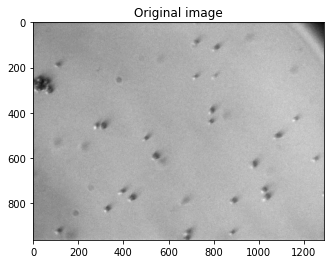

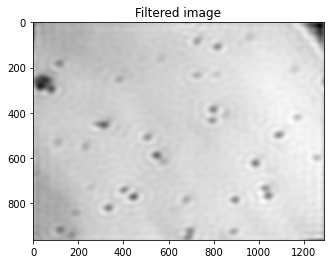

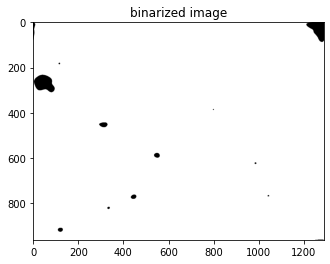

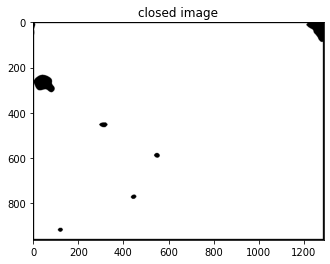

TypeError: ignored

In [26]:
# The image below corresponds to a snapshot of single cell organisms observed with a microscope


# Binarize the image to separate the organisms from the background
import cv2
import matplotlib.pyplot as plt

!wget "https://raw.githubusercontent.com/Henry-Medeiros/images/master/organisms.jpg"
img = cv2.imread('organisms.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY, 0) 
import cv2
import numpy, math
import scipy.fftpack as fftim
from PIL import Image
import scipy.ndimage as snd

# Performing FFT.
c = fftim.fft2(b)

d = fftim.fftshift(c)
# Intializing variables for convolution function.
M = d.shape[0]
N = d.shape[1]
# H is defined and
# values in H are initialized to 1.
H = numpy.ones((M,N))
center1 = M/2
center2 = N/2
d_0 = 30.0 # cut-off radius
# Defining the convolution function for ILPF.
for i in range(1,M):
  for j in range(1,N):
    r1 = (i-center1)**2+(j-center2)**2
# Euclidean distance from
# origin is computed.
    r = math.sqrt(r1)

# Using cut-off radius to eliminate
# high frequency.
    if r > d_0:
      H[i,j] = 0.0
# Converting H to an image.
H = Image.fromarray(H)
# Performing the convolution.
con = d * H
# Computing the magnitude of the inverse FFT.
e = abs(fftim.ifft2(con))
gray = e.astype('uint8')



#make the kernel
s = [[0,1,0],[1,1,1], [0,1,0]]
#two sets of thresholding
ret,thresh2 = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
y,x = cv2.threshold(thresh2, 128, 192, cv2.THRESH_OTSU)
#closing the image
x1 = snd.morphology.binary_closing(x, structure=s,iterations=5)


# visualization only
plt.imshow(img, 'gray')
plt.title('Original image')
plt.show()
plt.imshow(e, 'gray')
plt.title('Filtered image')
plt.show()
plt.imshow(thresh2, 'gray')
plt.title('binarized image')
plt.show()
plt.imshow(x1, 'gray')
plt.title('closed image')
plt.show()

pixels = x1.astype('uint8')
Zeros = x1.size - cv2.countNonZero(pixels)
Zeros
circles = cv2.HoughCircles(x1,cv2.HOUGH_GRADIENT,1,10,param1=1,param2=1,minRadius=0,maxRadius=10)
circles.size



In [ ]:
# Binarize the image to separate the organisms from the background
# Hint 1: You may need to remove some high-frequency noise from the image 
# before thresholding
# Hint 2: The background illumination in the image varies significantly, so a 
# single treshold for the entire will not work

In [ ]:
# Locate and plot the organisms present in the image
# Hint 3: You will need to apply a morphological filter to your binarized image 
# to remove spurious pixels left over by the binarization step
# morphological filter to close the objects

In [ ]:
# Count the the number of organisms present in the image and compute their 
# average area in pixels